# 로지스틱 회귀 (LogisticRegression)
- 선형회귀 알고리즘을 이용한 이진 분류 모델 -> 양성인 확률을 뽑아냄.
- Sample이 특정 클래스에 속할 확률을 추정한다.    


## 확률 추정
- 선형회귀 처럼 입력 특성(Feature)에 가중치 합을 계산한 값을 로지스틱 함수를 적용해 확률을 계산한다.
- logistic 함수를 곱하면, 0~1사이의 확률값이 나옴
\begin{align}
&\hat{p} = \sigma \left( \mathbf{w}^{T} \cdot \mathbf{X} + \mathbf{b} \right) \\
&\hat{p}:\: positive의\,확률,\quad \sigma():\:logistic\,함수,\quad \mathbf{w}:\:weight,\quad \mathbf{X}:\:input feature,\quad \mathbf{b}:\:bias
\end{align}

### 로지스틱 함수
- 0과 1사이의 실수를 반환한다.
- S 자 형태의 결과를 내는 **시그모이드 함수(sigmoid function)** 이다.

$$
\sigma(x) = \frac{1}{1 + \mathbf{e}^{-x}}
$$

x = wx+b

- 샘플 **x**가 양성에 속할 확률

$$
\hat{y} = \begin{cases} 0\quad\hat{p}<0.5\\1\quad\hat{p}\geqq0.5 \end{cases}
$$

##### logistic 함수 시각화

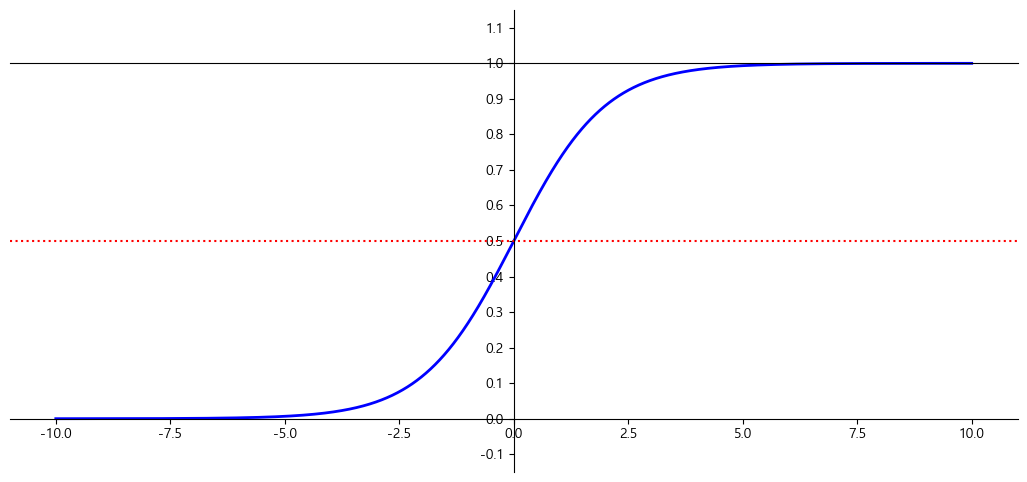

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def logistic_func(X):
    return 1 / (1 + np.exp(-X))  

X = np.linspace(-10, 10, 10000) 
y = logistic_func(X)

plt.figure(figsize=(13, 6))

plt.plot(X, y, color='b', linewidth=2)

# y 위치에 수평선을 그리는 함수.
# x 위치에 수직선을 그리는 함수(axvline(x=위치))
plt.axhline(y=0.5, color='r', linestyle=':')    #수평선을 y=0.5에 그림.
# plt. axvline(x=3, color= 'b')
plt.ylim(-0.15, 1.15) # y축 범위 지정.
plt.yticks(np.arange(-0.1,1.2,0.1))

ax = plt.gca()   # 객체지향방식 활용 
print(ax.spines)
ax.spines['left'].set_position("center")      # spine의 위치를 변경. - 상수
ax.spines['bottom'].set_position(('data', 0)) # 위치 변경 - 이동시킬 위치 값을 지정.
ax.spines['top'].set_position(("data", 1)) 
ax.spines['right'].set_visible(False)         # spine을 안보이게 처리.
plt.show()

## LogisticRegression의 손실 함수(Loss Function)
- **로그 손실함수(log loss)**
    - 일반적인 오차를 구하는 방법은 정답에서 예측한 확률을 빼는데 그럼 오차가 너무 작아짐. 
그래서 log 안에 넣는 방식을 사용해서 손실값을 크게 만든다.
    - 모델이 예측한 정답의 확률에 대해 log를 취해 손실값을 구한다.

        - 확률이 틀리면 틀릴 수록 손실값을 크게 만들기 위해서 log를 취한다.


$$
-\log{\left(모델이\,예측한\,정답에\,대한\,확률\right)}
$$


- **Binary Cross Entropy**
    - 2진 분류용 Log loss 함수
        - Logistic함수은 positive(1)의 확률만 추출하므로 정답이 0일때, 1일때 계산하는 것이 다르다. 그것을 하나의 공식으로 유도한 함수.
\begin{align}
L(\mathbf{W}) = - \frac{1}{m} \sum_{i=1}^{m}{\left[ y_{i} \log{\left( \hat{p}_i \right)} + \left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)} \right]}\\
y:\:실제값(정답),\quad\hat{p}:\:예측확률(양성확률)
\end{align}

<center>
정답이 0이면 log(1-p.hat)
정답이 1이면 log(p.hat) <br>
근데 거기에 정답인 값(0 또는 1)을 곱해서 더하면 결국 값은 정답인 애들의 확률만 남는다.
</center>

- y(실제값) 이 1인 경우 $y_{i}\log{\left(\hat{p}_i\right)}$ 이 손실을 계산
- y가 0인 경우 $\left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)}$이 손실을 계산
- $\hat{p}$(예측확률)이 클수록 반환값은 작아지고 작을 수록 값이 커진다. 

> - **Loss Function**
>   - 모델이 예측한 값과 정답간의 차이(오차, loss)를 구하는 함수.
>   - 모델의 파라미터를 최적화할 때 loss를 최소화하는 것을 목적으로 한다.
> 

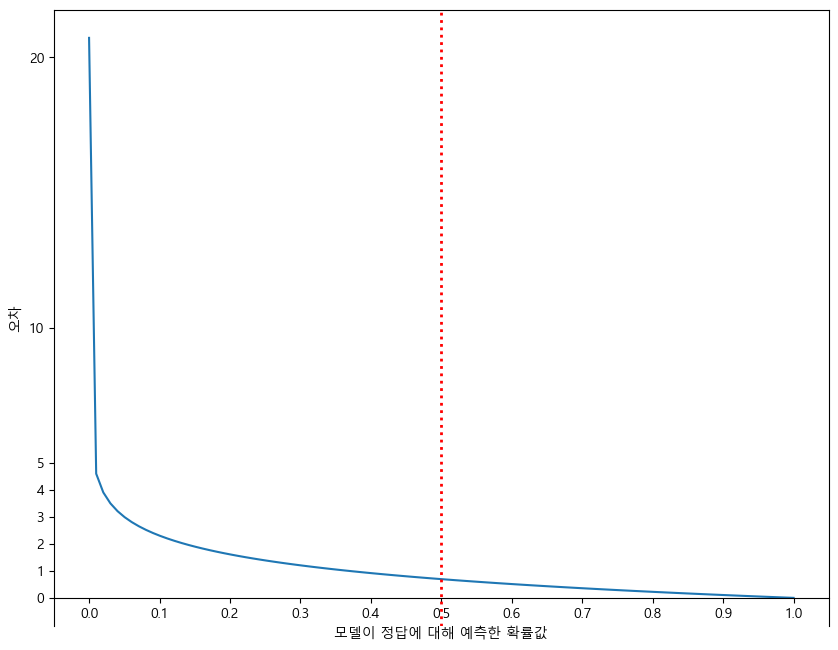

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0.000000001, 1, 100)   # 정답의 확률(X값)
y = -np.log(X)                         # 오차(log loss)

plt.figure(figsize=(10,8))
plt.plot(X, y)
plt.axvline(0.5, linestyle=':', linewidth=2, color='r')

plt.xticks(np.arange(0,1.1,0.1))
plt.yticks([0,1,2,3,4,5,10,20])

plt.xlabel("모델이 정답에 대해 예측한 확률값")
plt.ylabel("오차")

plt.gca().spines['bottom'].set_position(("data", 0))
plt.show()

In [16]:
-np.log(1), -np.log(0.500001)

(np.float64(-0.0), np.float64(0.6931451805619453))

In [17]:
-np.log(0.49999), -np.log(0.1), -np.log(0.01), -np.log(0.000000001)

(np.float64(0.693167180759948),
 np.float64(2.3025850929940455),
 np.float64(4.605170185988091),
 np.float64(20.72326583694641))

## LogisticRegression 모델 최적화 

- 분류 문제이므로 binary cross-entropy를 손실함수로 사용하여 **gradient descent(경사하강법)** 을 이용해 모델을 최적화한다.


## LogisticRegression 주요 하이퍼파라미터
- penalty: 과적합을 줄이기 위한 규제방식
    - 'l1', 'l2'(기본값), 'elasticnet', 'none' 
- C: 규제강도(기본값 1) - 작을 수록 규제가 강하다(단순).
- max_iter(기본값 100) : gradient descent의 반복횟수

## 예제

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

### 데이터 전처리
- LogisticRegression은 선형회귀 기반의 알고리즘이므로 연속형 Feature는 Feature scaling, 범주형 Feature는 One hot encoding 처리를 한다.

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ("scaler", StandardScaler()), ("model", LogisticRegression(random_state=0))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(random_state=0))])

In [ ]:
pipeline.steps[1][1]   #index순번으로 조회해서 모델을 가져오겠다.

LogisticRegression(random_state=0)

In [21]:
## LR - weight와 bias 를 조회
pipeline.steps[1][1].coef_

array([[-0.53920598, -0.43121045, -0.48894972, -0.57235136, -0.12651259,
         0.44745113, -0.73727937, -0.96309847,  0.10899318,  0.4314711 ,
        -1.32465716, -0.02190933, -0.65639595, -0.840148  , -0.20475766,
         0.66663119,  0.07494071, -0.4407399 ,  0.4149338 ,  0.62652627,
        -0.98445101, -0.97336912, -0.79832217, -0.8674727 , -0.73559409,
        -0.17872566, -0.76379438, -0.86189751, -0.78119307, -0.6077822 ]])

In [22]:
pipeline.steps[1][1].intercept_

array([0.34117272])

In [23]:
# 평가
pred_train = pipeline.predict(X_train)
pred_test = pipeline.predict(X_test)

pred_train_proba = pipeline.predict_proba(X_train)
pred_test_proba = pipeline.predict_proba(X_test)

In [27]:
pred_test[:5]

array([0, 0, 0, 1, 0])

In [25]:
pred_test_proba[:5]

array([[9.89182982e-01, 1.08170177e-02],
       [1.00000000e+00, 1.26256273e-13],
       [9.97962827e-01, 2.03717342e-03],
       [1.49041103e-02, 9.85095890e-01],
       [9.85491396e-01, 1.45086037e-02]])

In [28]:
from metrics import print_binary_classification_metrics
print_binary_classification_metrics(y_train, pred_train, pred_train_proba[:, 1])

정확도: 0.989010989010989
재현율: 0.9929824561403509
정밀도: 0.9895104895104895
F1 점수: 0.9912434325744308
Average Precision: 0.9985893579760078
ROC-AUC Score: 0.9979153766769865


In [ ]:
print_binary_classification_metrics(y_test, pred_test, pred_test_proba[:, 1])

### GridSearchCV를 이용해 하이퍼파라미터 탐색
- C

In [31]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='deprecated',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other input format will be converted
(and copied).

The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
with primal formulation, or no regularization. The 'liblinear' solver
supports both L1 and L2 regularization, with a dual formulation only for


In [33]:
from sklearn.model_selection import GridSearchCV

params = {
    "model__C": [0.01, 0.1, 1, 10],
    "model__penalty":['l1', 'l2'],
    "model__solver": ["liblinear"]
}
gs = GridSearchCV(
    pipeline,
    params,
    scoring="accuracy", 
    cv=4,
    n_jobs=-1
)
gs.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['liblinear']},
             scoring='accuracy')

In [34]:
gs.best_score_

np.float64(0.9780313615898152)

In [35]:
gs.best_params_

{'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'liblinear'}

In [36]:
import pandas as pd
df = pd.DataFrame(gs.cv_results_)
df.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__penalty,param_model__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
3,0.005030,0.001403,0.001988,0.000917,0.10,l2,liblinear,"{'model__C': 0.1, 'model__penalty': 'l2', 'mod...",0.973684,0.964912,0.991228,0.982301,0.978031,0.009790,1
5,0.005254,0.000300,0.001891,0.000420,1.00,l2,liblinear,"{'model__C': 1, 'model__penalty': 'l2', 'model...",0.964912,0.973684,0.982456,0.973451,0.973626,0.006204,2
4,0.004951,0.000675,0.003012,0.000622,1.00,l1,liblinear,"{'model__C': 1, 'model__penalty': 'l1', 'model...",0.964912,0.956140,0.982456,0.964602,0.967028,0.009578,3
2,0.008281,0.001881,0.002545,0.000318,0.10,l1,liblinear,"{'model__C': 0.1, 'model__penalty': 'l1', 'mod...",0.964912,0.964912,0.964912,0.955752,0.962622,0.003966,4
1,0.005325,0.001269,0.002285,0.000899,0.01,l2,liblinear,"{'model__C': 0.01, 'model__penalty': 'l2', 'mo...",0.938596,0.973684,0.991228,0.946903,0.962603,0.021006,5
7,0.004980,0.000502,0.002254,0.000176,10.00,l2,liblinear,"{'model__C': 10, 'model__penalty': 'l2', 'mode...",0.964912,0.973684,0.956140,0.946903,0.960410,0.009964,6
6,0.007941,0.002117,0.002424,0.000597,10.00,l1,liblinear,"{'model__C': 10, 'model__penalty': 'l1', 'mode...",0.956140,0.964912,0.947368,0.946903,0.953831,0.007381,7
0,0.004790,0.000492,0.002384,0.000410,0.01,l1,liblinear,"{'model__C': 0.01, 'model__penalty': 'l1', 'mo...",0.912281,0.956140,0.903509,0.920354,0.923071,0.020000,8


In [ ]:
# 분류에 대한 모델을 선택하기 위해서 for 문을 돌려야 함
SVC(), DT(), RFC(), XGB(), LR